# Bayesian probability of AAPL and Unemployment

In [1]:
import pandas as pd
import numpy as np

In [2]:
aapl = pd.read_csv('AAPL_HistoricalQuotes.csv')
aapl.head()

,Date,Close/Last,Volume,Open,High,Low
0,3/31/20,$254.29,49250500,$255.60,$262.49,$252
1,3/30/20,$254.81,41994110,$250.74,$255.52,$249.40
2,3/27/20,$247.74,51054150,$252.75,$255.87,$247.05
3,3/26/20,$258.44,63140170,$246.52,$258.68,$246.36
4,3/25/20,$245.52,75900510,$250.75,$258.25,$244.30


In [3]:
aapl.columns = list(map(lambda s: s.lstrip(), aapl.columns.values))
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl['Close/Last'] = aapl['Close/Last'].str.replace('$', '').astype(float)
aapl.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-03-31,254.29,49250500,$255.60,$262.49,$252
1,2020-03-30,254.81,41994110,$250.74,$255.52,$249.40
2,2020-03-27,247.74,51054150,$252.75,$255.87,$247.05
3,2020-03-26,258.44,63140170,$246.52,$258.68,$246.36
4,2020-03-25,245.52,75900510,$250.75,$258.25,$244.30


In [4]:
def subtract_open_from_close(x):
    
    month_close = x.loc[x.index.min(), 'Close/Last']
    
    month_open = x.loc[x.index.max(), 'Close/Last']
    
    return month_close - month_open

aapl_diff = aapl.groupby(aapl['Date'].dt.to_period('M')).apply(subtract_open_from_close)

aapl_df = pd.DataFrame({'date':aapl_diff.index, 'p_diff':aapl_diff.values})

aapl_df['date'] = aapl_df['date'].dt.strftime('%Y-%m')

aapl_df.head()

,date,p_diff
0,2015-05,1.33
1,2015-06,-5.11
2,2015-07,-5.30
3,2015-08,-5.68
4,2015-09,2.58


In [5]:
unemploy_rate = pd.read_excel('Unemployment_Rate.xlsx', skiprows=11)

u_rate = pd.melt(unemploy_rate, id_vars=['Year'], var_name='Month', value_name = 'u_rate')

u_rate['Month'] = u_rate.Month + " " + u_rate.Year.map(str)
u_rate = u_rate.drop('Year', axis=1)
u_rate['Month'] = pd.to_datetime(u_rate.Month, format='%b %Y', dayfirst=True)
u_rate = u_rate.sort_values('Month')

u_rate['date'] = pd.to_datetime(u_rate['Month']).dt.strftime('%Y-%m')
u_rate = u_rate.drop('Month', axis=1)

u_rate['u_diff'] = u_rate['u_rate'].diff()

In [6]:
u_rate

,u_rate,date,u_diff
0,9.8,2010-01,NaN
11,9.8,2010-02,0.0
22,9.9,2010-03,0.1
33,9.9,2010-04,0.0
44,9.6,2010-05,-0.3
...,...,...,...
87,NaN,2020-08,NaN
98,NaN,2020-09,NaN
109,NaN,2020-10,NaN
120,NaN,2020-11,NaN


In [ ]:
# take in extra data to train? 

In [13]:
merge_df = pd.merge(u_rate, aapl_df, how='inner', on='date')

merge_df.head()

,u_rate,date,u_diff,p_diff
0,5.6,2015-05,0.2,1.33
1,5.3,2015-06,-0.3,-5.11
2,5.2,2015-07,-0.1,-5.30
3,5.1,2015-08,-0.1,-5.68
4,5.0,2015-09,-0.1,2.58


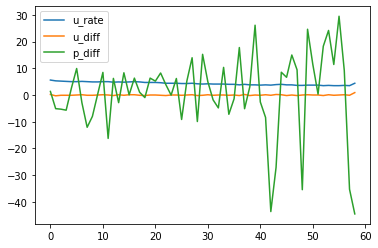

In [14]:
merge_df.plot()

In [15]:
merge_df['date'] = pd.to_datetime(merge_df['date'])

In [26]:
def cal_prob_p_drop_u_up(year_lim):

    df_period = merge_df.loc[(merge_df['date'].dt.year <= year_lim)]

    len_period = len(df_period)

    p_drop_df = df_period.loc[df_period['p_diff'] < 0]

    p_up_df = df_period.loc[df_period['p_diff'] > 0]

    prob_p_drop = len(p_drop_df) / len_period

    prob_p_up = len(p_up_df) / len_period

    prob_u_up_p_drop = len(p_drop_df.loc[p_drop_df['u_diff'] > 0]) / len(p_drop_df)

    p_up_df = df_period.loc[df_period['p_diff'] > 0]

    prob_u_up_p_up = len(p_up_df.loc[p_up_df['u_diff'] > 0]) / len(p_up_df)

    prob_p_drop_u_up = (prob_p_drop*prob_u_up_p_drop) \
                       / ((prob_p_drop*prob_u_up_p_drop)+(prob_p_up*prob_u_up_p_up))
    
    print(prob_p_drop_u_up)
    
    return(prob_p_drop_u_up)

In [27]:
list(map(lambda s: cal_prob_p_drop_u_up(s), np.arange(2016, 2021)))

0.3333333333333333
0.25
0.45454545454545453
0.35714285714285715
0.375


[0.3333333333333333, 0.25, 0.45454545454545453, 0.35714285714285715, 0.375]

In [ ]:
# need to check 2018 data...